# Open Policing Project 

## Abstract
***

In the US, an average of over 50,000 traffic stops are made by our police officers everyday. These are one of the most common interactions between the police and the public. Importantly, police officers are able to visually determine the physical characteristics of a driver (i.e. skin color in relation to race) before deciding to stop a driver. This is but one of the most common reflections of police bias. Police bias, whether implicit or explicit, has been a major ethical issue for a long time in our society. Depending on the severity of the charge,  this can have varying degrees of negative repercussions on the discriminated. For example, traffic citations have been [studied](https://www.thenewspaper.com/rlc/docs/2019/fl-ticketimpact.pdf) to have disproportionately negatively impacted low-income individuals, as they have a harder time to pay the fines. Thus, if there is police bias in deciding who to stop, then those who govern our society has unjustly decided to trap minority races in the cycle of poverty. While there have been existing studies on traffic stops in the US, the analysis has not been completed for all municipal and states. Given the huge diversity in the US, it is important that we hold every municipal or state accountable for potential racial discrimination.

The [Stanford Open Policing Project](https://openpolicing.stanford.edu/) is a comprehensive study of potential racial discrimination in traffic stops. Using data from 21 state patrol agencies and 29 municipal police departments, the project found significant racial disparities in traffic stop policing and evidence that bias plays a role in these disparities. Importantly, they use a principled and comprehensive approach to prove the presence of police bias. The core analysis of the project is done in R. In order to make the open source nature of the project more readily available to everyone, we will replicate the analysis and tutorial in Python. We will not only show that their findings are reproducible in Python, but also extend their analysis to a Sacramento dataset. As each dataset will be different, we provide a more in-depth guidance for the Sacramento dataset for the reader to demonstrate the thought process at each step of the data analysis. This will also be highly useful for readers who do not have much experience with Python. However, for users who are mainly interested in analysis, we also supplement the guidance code with functions that will make our analysis more easily replicable for other states/municpals.

We found some evidence of racial bias against primarily African American and Hispanic drivers. We also conduct similar analysis to look for gender bias, finding some evidence of bias against male drivers.

## Methodology
***

We start with a baseline **benchmark test** by comparing stop rates per capita. By accounting for population demographics for each race, we can account for rate disparities that result from differences in population sizes. 

The **Veil of Darkness (VOD) test** works on the hypothesis that police officers who are racial or gender profiling are less likely to identify a driver's race when it is dark. By looking only at times that had daylight at some point in the studied period but were dark at another point in the studied period, we can compare for differences in stop rates when it is dark versus when it is not dark, controlling for time-related factors. For robustness, we ran a logistic regression for each minority group measuring the impact of darkness on the indicator of whether a person is in the minority group. We can then look at the coefficient on the indicator of darkness, known as the ‘coefficient of darkness’ to assess the presence of racial or gender profiling.

We conducted an **outcome test** which analyzes the search decision rather than the stop decision. We look at the proportion of successful searches, by minority groups, known as the hit rate. The original study believed that different police districts may have different bars for stopping people and therefore controlled for police districts. As we do not have police districts data for each police stop, we decided to condition on police officers instead. This is not only a good proxy for police districts, but may also be more informative given that minority group profiling probably occurs on an individual rather than district level. If police officers have huge disparity in hit rates across different minority groups, this would be compelling evidence of racial discrimination. However, the outcome test is flawed because it suffers from the problem of intra-marginality. Even without discrimination, there might be a rates disparity across minority groups because of a difference in risk distribution within groups. 

The **threshold test** circumvents the limitations of outcome tests by simultaneously estimating decision thresholds and risk distributions, in order to validate the outcome test. We construct a hierarchical Bayesian latent variable model by assuming that search and hit rates result from an evaluation of minority group and police-specific signals against minority group and police-specific threshold values. When police officers stop a driver, they form their own probabilities, $p_i$ that the stopped driver has contrabands based on the driver’s minority group and their own individual judgement. They also have an individual threshold $t_i$ for each minority group for deciding when to search a stopped driver. If $p_i ≥ t_i$ they decide to search the stopped driver. The success of the search is then a draw from a $Bernoulli~(p_i)$ distribution. If there is a significant difference in thresholds across groups, we may have reason to believe that there is minority group profiling. 


<img src="image/bayesian_model.png" width="400">


Our code for these tests can be found in the files `calculations.py` and `plotting.py`. More details about each test is included in our analysis of the Sacramento dataset.

## Reproducing Stanford Open Policing Project's Work
***

Here we summarize the other notebooks of this project.

Link to [Philadelphia Data Analysis Tutorial](philadelphia_notebook.ipynb)

This notebook follows through the Stanford Open Policing Project tutorial (https://openpolicing.stanford.edu/tutorials/) in order to ensure that our Python implementation of the different tests used to measure police bias results in the same or similar results on the tutorial dataset. This allows us to make sure that our understanding of the different tests is correct. We found that we were able to almost reproduce the tutorial in Python almost perfectly. The only concern we had was that Python (in particular the `seaborn` and `matplotlib` packages) do not flexibilities in their plotting functions like R's `ggplot` does, so our plots are not as visually appealing compared to theirs. We also did see some very minor differences in the Veil of Darkness test; upon further investigation, this seems to due to a minor difference on how sunset and dusk times are calculated in the Python package `astral` and the R package `suncalc`. However, this does not change the analysis in any significant way. Therefore, we believe that we have correctly implemented the tests in Python. However, one caution is that we are not able to test the threshold test through this method; however, since we will be using the [stan file](https://github.com/5harad/threshold-test/blob/master/src/model.stan) written directly by the authors of the paper of the threshold test, and we read both the paper and the stan file to make sure that they make sense, we have no reason to believe that the model is wrong. 

Link to [Reproducing Stanford Open Policing Project Findings](reproduce_stanford.ipynb)

Since the focus of this project is not reproducing the finding, but coming up with our own analyses, we did not spend a lot of time on this part, but we spent enough time to produce some results. We did not conduct the threshold test in the reproduction because Bayesian modeling is quite an expensive and timely procedure, and we simply did not have the time or resources to conduct the threshold test for every dataset. However, their basic Stan file on Github seems to be the same as the one provided by the authors of the threshold test paper, with the variables renamed. Thus we do not have any reason to believe that they are conducting the threshold test wrong.  We focused on reproducing the stop rates, search rates, arrest rates, and hit rates of the cities used in their work. The project on their Github repo provides a CSV file containing geographic information for the cities used in their work and also a CSV file containing demographic information for every city/town from the American Community Survey (ACS) of the Census Bureau for the year 2017. We did some minor cleaning/preprocessing work in a [seperate notebook](make_city_attributes_csv.ipynb) to make one CSV containing both the demographic and geographic information of the relevant cities. Then, it becomes trivial to write a script to conduct the necessary analysis for each city. We found that we were able to reproduce the findings on the website somewhat. In general, while we do see the the same patterns as their findings, we do see some obvious differences. For example, below is the difference in search rates.

### Our Search Rates

<img src="image/search_rates.png" width="800">


### Findings Search Ratess

<table><tr>
    <td> <img src="image/black_search_rates_findings.png" width="400"> </td>
    <td> <img src="image/hispanic_search_rates_findings.png" width="400"> </td>
</tr></table>


It seems like that we have a lot more points than the findings do, implying that the findngs removed quite some number of points. If we ignore all the zero search rates that the two plots would be pretty similar. If the points were removed because there may be too few samples for that point, then there's valid justification. However, we looked at both the corresponding paper (https://5harad.com/papers/100M-stops.pdf) and the code they wrote to conduct their analysis to see if there is anywhere where they justified or even mentioned removing data points, but we could not find such comments. It is rather concerning that points were removed without justifcation, since it may be the case that the points were removed because they did not support the authors' beliefs. While it is probably the case that the authors just removed the points with too few samples, they should still state somewhere explictly about removing them, especially if their findings could potentially impact the way the public perceives the police and the way the police conduct their stops. 



## Analysis
***

Now we start conducting our analysis on the Sacramento dataset. Note that we styled it in the fashion of a tutorial similar to the one by the Stanford Open Policing Project to promote the open source nature of the project and make it more readily available to everyone.

## Setup
***

In [2]:
from astral import Astral, AstralGeocoder, Location

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
import statsmodels.api as sm

from calculations import *
from plotting import *
from patsy import dmatrix

import datetime
import pystan

%matplotlib inline

We typically import all the relevant libraries and functions right at the start of our .py file or .ipynb notebook. All the required libraries should be available to you after you install the necessary packages, which can be found in `requirements.txt`. All the packages can be installed easily using `pip` through the command in a terminal

```
pip install -r requirements.txt
```

**Note**: Since we are in a .ipynb notebook, and we want to display our matplotlib graphs next to our code, we used a 'magic function' `%matplotlib inline` (prefixed with `%`), to set the backend of matplotlib to the 'inline' backend. There are tons of 'magic functions' in IPython and you can find out more [here](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained)!

## Covering the Basics
***

In [17]:
# http://data.cityofsacramento.org/datasets/a8cb4c137c824e939dca586c6dc77da9_0/data
sacramento_stops = pd.read_csv('data/sacramento_stops.csv')
sacramento_stops.head()

,Idx,CitationNumber,EntryDate,StopType,StopDTS,StopCause,ViolationNumber,SpecialCondition,Race,Gender,...,ResultCitation,ResultArrest,ResultReport,ResultAdvised,ResultFC,CadCallNumber,DetentionDuration,OfficerAbra,LimitedLanguage,FID
0,430490,NaN,2017-03-22T02:28:48.000Z,VEHICLE,2017-03-22T02:09:00.000Z,REGISTRATION OR REQUIRED EQUIPMENT VIOLATION,4000A,NOT APPLICABLE,ASIAN/PACIFIC ISLANDER,M,...,False,False,False,True,False,17-080525,10,4077,False,4001
1,430491,NaN,2017-03-22T02:47:35.000Z,VEHICLE,2017-03-22T02:10:00.000Z,REGISTRATION OR REQUIRED EQUIPMENT VIOLATION,4000(A) VC,NOT APPLICABLE,AFRICAN AMERICAN,F,...,False,False,False,True,False,17-080526,15,4183,False,4002
2,430492,NaN,2017-03-22T02:56:58.000Z,VEHICLE,2017-03-22T02:43:00.000Z,REGISTRATION OR REQUIRED EQUIPMENT VIOLATION,5200A,NOT APPLICABLE,AFRICAN AMERICAN,F,...,False,False,False,True,False,17-080553,10,4077,False,4003
3,430493,NaN,2017-03-22T03:00:28.000Z,VEHICLE,2017-03-15T01:38:00.000Z,REGISTRATION OR REQUIRED EQUIPMENT VIOLATION,4000A VC,NOT APPLICABLE,AFRICAN AMERICAN,F,...,False,False,False,True,False,17-073156,15,3477,False,4004
4,430494,NaN,2017-03-22T03:09:24.000Z,VEHICLE,2017-03-15T01:22:00.000Z,REGISTRATION OR REQUIRED EQUIPMENT VIOLATION,4000A VC,NOT APPLICABLE,HISPANIC,M,...,False,False,False,False,False,17-073141,5,3477,False,4005


A `pandas` dataframe is basically what you would expect of a spreadsheet. Data is arranged in a tabular format, with each column representing a feature, and each row being a particular observation. It is often particularly important to understand the granularity of the data you are given, where granularity describes what each observation represents. Here, each observation is a police stop. The columns thus represent the details of a police stop, i.e. reason behind the stop, the race of the person stopped. The meaning of each column can be found in this [link](https://www.cityofsacramento.org/-/media/Corporate/Files/Police/Transparency/VSDF/Understanding-Vehicle-Stop-Data-Fields-and-Points-of-Collection.pdf?la=en).

In order to better understand the data, we get some quick summaries.

In [18]:
sacramento_stops.shape, sacramento_stops.columns.values

((59235, 36),
 array(['Idx', 'CitationNumber', 'EntryDate', 'StopType', 'StopDTS',
        'StopCause', 'ViolationNumber', 'SpecialCondition', 'Race',
        'Gender', 'BirthYear', 'ExitVehicle', 'PassengerCount',
        'SearchDriver', 'SearchPassenger', 'SearchVehicle', 'Authority',
        'ConsentRequested', 'ConsentGranted', 'FSWeapons', 'FSDrugs',
        'FSCash', 'FSVehicle', 'FSAlcohol', 'FSOtherProperty', 'FSNothing',
        'ResultCitation', 'ResultArrest', 'ResultReport', 'ResultAdvised',
        'ResultFC', 'CadCallNumber', 'DetentionDuration', 'OfficerAbra',
        'LimitedLanguage', 'FID'], dtype=object))

In [19]:
sacramento_stops.describe() 

,Idx,BirthYear,PassengerCount,DetentionDuration,OfficerAbra,FID
count,59235.000000,59235.000000,59235.000000,59235.000000,59235.000000,59235.000000
mean,459747.654647,1982.200827,0.577648,12.090014,3806.103604,29618.000000
std,20073.005009,13.623040,1.974042,14.102620,899.490514,17099.815935
min,426190.000000,1900.000000,0.000000,0.000000,5.000000,1.000000
25%,442437.500000,1974.000000,0.000000,8.000000,3602.000000,14809.500000
50%,459246.000000,1986.000000,0.000000,10.000000,4094.000000,29618.000000
75%,477051.500000,1993.000000,1.000000,15.000000,4345.000000,44426.500000
max,495864.000000,2019.000000,425.000000,543.000000,5453.000000,59235.000000


We started by looking at the shape of our dataframe. Our dataframe has 59235 rows, and 36 columns. This means that there 59235 stops in our dataset, and there are 36 possible features, which we also listed out. The `.describe()` method is often a quick tool to (mainly) get the key statistics of the quantitative features in our data. This lets us find the average, standard deviation, range, etc. of the quantitative features. 

What is the date range that our data covers though? It is important to know the dates of analysis so that we can make better comparison with other states/muncipals. We note that the column for dates `StopDTS`, is not encoded in datetime format yet. There are other ways of converting strings to datetime format, but `pandas` has a very convenient `to_datetime()` function that does the job for us. With a datetime object, it is then extremely simple to extract various time information from our data, i.e. year, month, day, time. Here, we just extracted/separated the date and time objects.

**Note**: When we deal with time data, it is important to note the appropriate timezone. This should usually be documented in a data dictionary, or a documentation of the dataset. Here, we note that times are in UTC.

In [20]:
# As according to the documentation of the dataset, times are in UTC. Keep that in mind when during veil of darkness
sacramento_stops['date'] = pd.to_datetime(sacramento_stops['StopDTS']).apply(lambda date: date.date)
sacramento_stops['time'] = pd.to_datetime(sacramento_stops['StopDTS']).apply(lambda date: date.time)

In [21]:
sacramento_stops['date'].min(), sacramento_stops['date'].max()

(datetime.date(2017, 2, 1), datetime.date(2019, 1, 1))

It seems like the data is from February 1st 2017 to January 1st 2019. There are not alot of observations in 2019 given that it is only 1 day. As such, we decided to exclude the observations on January 1st 2019 in our analysi. This is a relatively straightforward process using standard `pandas` filtering mechanism shown below.

In [22]:
start_date = datetime.date(2017,2,1)
stop_date = datetime.date(2019,1,1)
sacramento_stops = sacramento_stops[(sacramento_stops['date'] >= start_date) & (sacramento_stops['date'] < stop_date)]

For the purposes of our analysis, we want to filter out just the observations for vehicular stops. For this dataset, there are only vehicular stops data. However, you may find datasets with pedestrian stops data as well. It might then be interesting to do whole new analysis on pedestrian stops data.

In [23]:
sacramento_stops.StopType.unique()

array(['VEHICLE'], dtype=object)

In most of the datasets that you will find, some form of pre-processing is necessary before you can conduct any analysis on it. It can range from filtering dates to dealing with missing data. Importantly, you should have some form of understanding of the type of analysis intended for your data pre-processing. Let us start by identifying whether there is missing data or corrupted fields. It is easy to identify missing data in general with the `.isna()` function which returns a boolean if the row has a missing field. 

**Note**: If you wish to replace missing data, there are several ways of approaching the problem. You may just replace it with a 0, the mean of the field, etc. or you may just include an indicator column. There are even more principled ways of imputing missing values! However, there is no hard and fast rule, just remember to justify why you did it, and how do you think it will bias your results.

In [24]:
# list missing data
for col in sacramento_stops.columns:
    missno = np.sum(sacramento_stops[col].isna())
    if missno > 0:
        print('{} has {} missing rows'.format(col, missno))

CitationNumber has 39160 missing rows
ViolationNumber has 95 missing rows
ExitVehicle has 701 missing rows
ConsentRequested has 28750 missing rows
ConsentGranted has 55302 missing rows


Thankfully, it seems like we will not be using the fields with missing values for our analysis (for now). 

Dealing with corrupted fields is arguably even trickier. A corrupted field is basically a field that you may have reason to believe has been wrongly entered. If there is a well-documented data dictionary with clear constraints applied to each field, this might not be a big issue. However, it often takes plenty of time at staring at your data before you can identify corrupted fields. And there may not even be any issues with your data! 

For this particular dataset, we found that there were observations in which a search was not conducted, but there were contrabands found. This seems slightly contradictory. Although it is entirely possible that a person gives up their contraband without being searched, it is not particularly common and it would make our analysis trickier. We decided to remove those observations. 

**Note**: For the ease of analysis, we also grouped `SearchDriver` and `SearchVehicle` together into one variable representing whether a search was conducted. We note that the race variable is specfically for the driver. As such, we only considered instances when at least one of the driver or the vehicle were searched as an indicator of whether any search was conducted. Intuitively, if only the passenger was searched, it does not make sense to correlate the race of the driver with the stop.  

Similarly, we also grouped `FSAlcohol`, `FSCash`, `FSDrugs`, `FSOtherProperty`, `FSWeapons`, and `FSVehicle` together into one variable representing whether any contraband item was found. We note that not all datasets are so detailed about the type of contraband item that was confiscated. As such, we might do a subsequent analysis making use of the different types of contrabands.

In [25]:
# note that this is different from other analysis which includes SearchPassenger as well
sacramento_stops['search_conducted'] = ((sacramento_stops['SearchDriver']) | (sacramento_stops['SearchVehicle']))
sacramento_stops['search_conducted'].sum()

7874

In [26]:
sacramento_stops['contraband_found'] = ((sacramento_stops['FSAlcohol']) | (sacramento_stops['FSCash']) |
                                       (sacramento_stops['FSDrugs']) | (sacramento_stops['FSOtherProperty']) |
                                       (sacramento_stops['FSWeapons']) | (sacramento_stops['FSVehicle']))
sacramento_stops['contraband_found'].sum()

1558

In [27]:
# Search not conducted, but contraband found. only 46 observations like these. Remove
print(len(sacramento_stops[((~sacramento_stops['search_conducted']) & (sacramento_stops['contraband_found']))]))
sacramento_stops = sacramento_stops[~((~sacramento_stops['search_conducted']) & (sacramento_stops['contraband_found']))]

46


Now that we have cleaned our data, let us get a quick sense of the count and proportion of stops by race and/or year and month in Sacremento. We see that there are some of race categories that can be grouped together for the purposes of our analysis. Depending on the minority race of interest, this may be done differently.

In [28]:
sacramento_stops['Race'].unique()

array(['ASIAN/PACIFIC ISLANDER', 'AFRICAN AMERICAN', 'HISPANIC', 'WHITE',
       'OTHER/NOT APPARENT', 'ASIAN OTHER', 'UNKNOWN', 'NATIVE AMERICAN',
       'MIXED RACE', 'CHINESE', 'AM. IND./AL. NATIVE', 'EAST INDIAN',
       'ASIAN INDIAN', 'MIEN', 'HAWAIIAN', 'MIDDLE EASTERN',
       'CUBAN/CARRIBEAN', 'PACIFIC ISLANDER', 'HMONG', 'FILIPINO',
       'GUAMANIAN', 'VIETNAMESE', 'SAMOAN', 'ORIENTAL/ASIAN', 'CAMBODIAN',
       'JAPANESE'], dtype=object)

In [29]:
# Convert to standardized names
sacramento_stops['subject_race'] = sacramento_stops['Race'].str.lower()
sacramento_stops['subject_race'] = sacramento_stops['subject_race'].replace({
                                    'other/not apparent': 'other/unknown',
                                    'asian other': 'asian/pacific islander',
                                    'chinese': 'asian/pacific islander',
                                    'east indian': 'asian/pacific islander',
                                    'pacific islander': 'asian/pacific islander',
                                    'vietnamese': 'asian/pacific islander',
                                    'oriental/asian': 'asian/pacific islander',
                                    'cambodian': 'asian/pacific islander',
                                    'japanese': 'asian/pacific islander',
                                    'asian indian': 'asian/pacific islander',
                                    'hmong': 'asian/pacific islander',
                                    'filipino': 'asian/pacific islander',
                                    'mien': 'asian/pacific islander',
                                    'hawaiian': 'asian/pacific islander',
                                    'samoan': 'asian/pacific islander',
                                    'guamanian': 'asian/pacific islander',
                                    'mixed race': 'other/unknown',
                                    'am. ind./al. native': 'other/unknown',
                                    'middle eastern': 'other/unknown',
                                    'cuban/carribean': 'hispanic',
                                    'unknown': 'other/unknown',
                                    'native american': 'other/unknown'
                    })

sacramento_stops['subject_race'].unique()

array(['asian/pacific islander', 'african american', 'hispanic', 'white',
       'other/unknown'], dtype=object)

In order to group the data by categories, we have to use a `.groupby()` function. The basic setup is `df.groupby([COLUMNS TO GROUP BY]).FUNC()` where we apply an aggregation function `FUNC()` across each of the grouped categories. 

In [30]:
sacramento_stops['year'] = sacramento_stops['date'].apply(lambda date: date.year)
sacramento_stops['month'] = sacramento_stops['date'].apply(lambda date: date.month)
(sacramento_stops
 .groupby(['year', 'month'], as_index=False)['Idx']
 .agg({'n': len,
       'prop': lambda x: len(x)/len(sacramento_stops)}))

,year,month,n,prop
0,2017,2,2332,0.039414
1,2017,3,2926,0.049453
2,2017,4,2466,0.041679
3,2017,5,1619,0.027363
4,2017,6,1956,0.033059
5,2017,7,2750,0.046479
6,2017,8,2718,0.045938
7,2017,9,2480,0.041915
8,2017,10,2756,0.046580
9,2017,11,2509,0.042405


In [31]:
(sacramento_stops
 .groupby(['subject_race'], as_index=False)[sacramento_stops.columns.values[12]]
 .agg({'n': len,
       'prop': lambda x: len(x)/len(sacramento_stops)}))


,subject_race,n,prop
0,african american,20184,0.341136
1,asian/pacific islander,4263,0.072050
2,hispanic,12833,0.216895
3,other/unknown,6014,0.101644
4,white,15873,0.268275


We have defined our own functions to do these calculations for us. One just needs to import the relevant function from either `calculations.py` or `plotting.py`. However, one should not rely on pre-defined functions blindly. In our case we have documented our functions well, so be sure to read them to actually understand them!

If we had imported a function from either `calculations.py` or `plotting.py` in a cell, this means that we are doing the same calculations as the cell before the cell.

In [43]:
from calculations import calc_group_size
calc_group_size(sacramento_stops, 'subject_race', include_prop = True)

,subject_race,n,prop
0,african american,20184,0.341136
1,asian/pacific islander,4263,0.072050
2,hispanic,12833,0.216895
3,other/unknown,6014,0.101644
4,white,15873,0.268275


What if we wanted to check the number of stops by race and year? We could do a `groupby` function, but it would be difficult to interpret. Instead, let us plot a graph with `seaborn`. `seaborn` allows us to make plots with an implicit groupby through the parameter `hue`. Most of the seaborn plotting functions will have the parameter, which basically groups the data by a category before plotting. This allows us to represent a 3rd dimension in our plots, through different colors. You could of course do this with the basic `matplotlib`, but it is much easier with `seaborn`.

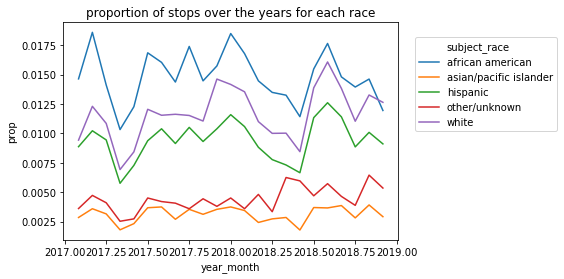

In [19]:
race_year_plot = calc_group_size(sacramento_stops, ['subject_race', 'year', 'month'])

# in order to plot year and month, we make a new column compressing the information
race_year_plot['year_month'] = race_year_plot['year'] + (race_year_plot['month']-1)/12.

ax = sns.lineplot(x='year_month', y='prop', hue='subject_race', data=race_year_plot)
ax.legend(loc = (1.05, 0.5))
ax.set_title('proportion of stops over the years for each race');

From this plot, it seems that for most of the races, the trend over the years has been pretty similar. We note that there seems to be a cyclical pattern where there seems to be a dip in traffic stops near the start of the year. This might be interesting for a different follow-up study. Importantly, we note that the proportion of stops has been largely higher for African Americans over the years, although it seems that the proportion of stops is higher for Whites in the last month of 2018. This does not necessarily mean much though, as it may simply be the case that there are more African Americans in Sacramento. Nonetheless, this is a good start for deeper analysis! 

Also, it is evident that there is a low number of Asian/Pacific Islanders in this dataset. As such, we believe that we cannot conduct any analysis related to this group.

## Benchmark Test
***

### Stop rates

As we alluded to previously, in order to do a baseline comparison, we need to have the population proportions across racial demographics in Sacremento. Let us also just do the analysis for 2018. If you are doing the analysis for a different time period, note that you would have to scale the rates accordingly.

In [32]:
stops_2018 = sacramento_stops[sacramento_stops['date'].apply(lambda date: date.year == 2018)]
stops_2018 = stops_2018[stops_2018['subject_race'] != 'other/unknown']

In [33]:
#https://www.census.gov/quickfacts/fact/table/sacramentocountycalifornia,ca/PST045217
sacramento_population_2018 = 1530615

#White, African American, Hispanic
sacramento_race_percentages = {"white": .448, "african american": .109 , "hispanic": .186, 
                              "asian/pacific islander": .179, 'other/unknown': 0.077}
sacramento_race_demo = pd.DataFrame(sacramento_race_percentages, index=['prop']).T.reset_index()
sacramento_race_demo.columns = ['subject_race', 'prop']
sacramento_race_demo['num_people'] = sacramento_race_demo['prop']*sacramento_population_2018
sacramento_race_demo

,subject_race,prop,num_people
0,white,0.448,685715.520
1,african american,0.109,166837.035
2,hispanic,0.186,284694.390
3,asian/pacific islander,0.179,273980.085
4,other/unknown,0.077,117857.355


Now that we have the population demographics in Sacremento, let us calculate the stop rate per capita for each race. We basically merge the dataframe with total number of stops for each demographic with the dataframe with the total number of residents in each demographic, and divide the two columns. The merge can be easily done with a `merge()` function. The exact details of a merge function requires us to go into detail about the differences between a left merge, right merge, inner merge, outer merge, etc. As such, we would not go into detail. Instead, we would encourage the reader to read the existing [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) for the `merge` function. Whenever you come across a new function, you should always read through the documentation to make sure you understand what the function does. In short, the `merge` function basically concatenates two dataframes across columns, based on a specific shared column. 

In [34]:
sacramento_stops_race = (stops_2018
                         .groupby(['subject_race'], as_index=False)['Idx']
                         .agg({'n': len}))

sacramento_stop_rates = sacramento_stops_race.merge(sacramento_race_demo, how='left', on='subject_race')
sacramento_stop_rates['stop_rate'] = sacramento_stop_rates['n'] / sacramento_stop_rates['num_people']
sacramento_stop_rates.drop(['n', 'num_people', 'prop'], axis=1, inplace=True)
sacramento_stop_rates

,subject_race,stop_rate
0,african american,0.062540
1,asian/pacific islander,0.008190
2,hispanic,0.024142
3,white,0.012762


In [42]:
from calculations import calc_stop_rates
calc_stop_rates(stops_2018, sacramento_race_demo, ['subject_race'], population_col = 'num_people')

,subject_race,stop_rate
0,african american,0.062540
1,asian/pacific islander,0.008190
2,hispanic,0.024142
3,white,0.012762


Now we can make better statements about the stop rates for each race! It seems that African drivers are stopped at a rate almost 5 times higher than White drivers and Hispanic drivers are stopped almost 2 times higher than White drivers!

### Search rates

Let us do the same comparison and analysis for search rates. Instead of using the total population size as a baseline (as in stop rates), it makes sense to instead use the stopped population. As such, search rate is the proportion of stopped people who were subsequently searched. 

**Note**: Some states and municipals also include frisk rates. It may be worth your time to do a similar analysis on frisk rates as well.

In [24]:
(stops_2018
 .groupby('subject_race', as_index=False)['search_conducted']
 .agg({'search_rate': np.mean}))

,subject_race,search_rate
0,african american,0.206345
1,asian/pacific islander,0.070856
2,hispanic,0.150153
3,white,0.076220


In [41]:
from calculations import calc_search_rates
calc_search_rates(stops_2018, ['subject_race'], search_col = 'search_conducted')

,subject_race,search_rate
0,african american,0.206345
1,asian/pacific islander,0.070856
2,hispanic,0.150153
3,white,0.076220


Similar to stop rates, it seems that African American drivers are searched almost 3 times as much as White drivers and that Hispanic drivers are searched almost 2 times as much as White drivers! This seems ridiculous, but let us not make any conclusions without more principled approaches to understanding these statistics. 

### Arrest rates

Lastly, we will look at the arrest rate.

In [37]:
(stops_2018
 .groupby('subject_race', as_index=False)['ResultArrest']
 .agg({'arrest_rate': np.mean}))

,subject_race,arrest_rate
0,african american,0.027985
1,asian/pacific islander,0.017380
2,hispanic,0.030991
3,white,0.020683


In [40]:
from calculations import calc_arrest_rates
calc_arrest_rates(stops_2018, ['subject_race'], arrest_col = 'ResultArrest')

,subject_race,arrest_rate
0,african american,0.027985
1,asian/pacific islander,0.017380
2,hispanic,0.030991
3,white,0.020683


It seems that African American drivers are arrested almost 1.35 times as much as White drivers and Hispanic drivers are arrested almost 1.5 times as much as White drivers! 

### Caveats about the benchmark test

The benchmark test is useful for some quick statistics, but it does not provide any evidence of discrimination. This is because we have not been comparing to the correct baseline. In particular, the stop rates need not necessarily suggest that African American and Hispanic drivers have been disproportionately stopped. It does not take into account possible racial differences in driving behavior. Also, some of you may have already noticed, but we have been calculating the rate with respect to the total population within each demographic when we should be calculating the rate with respect to the total number of individuals breaking traffic laws, or exhibiting other criminal behavior in their vehicles. Ideally, if we know that the number of African American drivers stopped is disproportionate to the total number of offenders, then we would have strong evidence that there is racial discrimination. Unfortunately, there is no way to have a good measure of the total number of offenders. Using arrest rate would not be a good proxy as arrest rate could similarly be racially skewed as well since it is the police officer making the decision.

We should conduct more principled analysis of our data before we make any conclusions.

## Veil of Darkness test
***

There is another alternative to assessing bias in stop decisions known as the Veil of Darkness test. It was originally proposed by Grogger and Ridgeway in 2006. The Veil of Darkness test works on the hypothesis that police officers who are racial profiling are less likely to identify a driver's race when it is dark. As such, under this hypothesis, we would expect that if stops made after dark had a smaller proportion of African American drivers than during daytime, it might be evidence that at least some police officers are racial profiling drivers. Nonetheless, there are many things that can be correlated with time, i.e. enforcement patterns, driving schedule. As such, we would only compare within an inter-twilight period.

The inter-twilight period is essentially the period of time between the earliest dusk time and the latest dusk time (within the period of interest). As the 30 minute period between sunset and dusk has ambiguous daylight, we filter out stops in those times. 

This allows us to compare times that had daylight at some point in the studied period but were dark at another point in the studied period and see if there are any differences. Intuitively, we would be able to compare the same group of drivers and police officers, and thus observe the effect of darkness of police stop decisions. 

We have written a function `calc_sunset_times` that taps on the `astral` package to calculate both the sunset and dusk times given a specific longitude and latitude. 

**Note**: As the number of stops will decrease greatly after the filtering of twilight hours, we will be using the full dataset instead of just the 2018 data for Sacramento. This is because there is huge variability in our results with just the 2018 data due to the small dataset size.

In [47]:
sacramento_lat = 38.5816
sacramento_long = -121.4944

# calculate sunset and dusk times in sacremento
from calculations import calc_sunset_times
sunset_time = calc_sunset_times(sacramento_stops, sacramento_lat, sacramento_long, 'UTC')
sunset_time.head()

,date,sunset,dusk,sunset_minute,dusk_minute
0,2017-03-22,02:19:09,02:45:39,139,165
1,2017-03-15,02:12:22,02:38:48,132,158
2,2017-03-14,02:11:23,02:37:49,131,157
3,2017-03-10,02:07:25,02:33:53,127,153
4,2017-03-09,02:06:25,02:32:54,126,152


Given the dataframe of sunset and dusk times, we can then filter our original dataframe such that we only keep the stops within the inter-twilight period, and excluding the ambiguous period. 

In [48]:
vod_stops = sacramento_stops.merge(sunset_time, how='left' ,on='date')
vod_stops['minute'] = vod_stops['time'].apply(lambda t: t.hour*60 + t.minute)
vod_stops['minutes_after_dark'] = vod_stops['minute'] - vod_stops['dusk_minute']
vod_stops['is_dark'] = (vod_stops['minute'] > vod_stops['dusk_minute']).astype('int')

# filter to intertwilight period
min_dusk_minute = vod_stops['dusk_minute'].min()
max_dusk_minute = vod_stops['dusk_minute'].max()
vod_stops = vod_stops[(vod_stops['minute'] >= min_dusk_minute) & (vod_stops['minute'] <= max_dusk_minute)]

# remove ambiguous period
vod_stops = vod_stops[~((vod_stops['minute'] > vod_stops['sunset_minute']) & (vod_stops['minute'] < vod_stops['dusk_minute']))]

print(vod_stops.shape)
vod_stops['time'].min(), vod_stops['time'].max()

(7110, 50)


(datetime.time(1, 14), datetime.time(4, 6))

In [49]:
from calculations import get_veil_of_darkness_observations
vod_stops = get_veil_of_darkness_observations(sacramento_stops, sunset_time)
print(vod_stops.shape)
vod_stops['time'].min(), vod_stops['time'].max()

(7110, 50)


(datetime.time(1, 14), datetime.time(4, 6))

We still have a sizeable number of stops to do our analysis. Note that we are doing our calculations in UTC time. As such, the twilight time ranges that we have are actually pretty reasonable. We can see that the earliest time we have is actually 6:15pm (Pacific Daylight Time), and the latest time we have is actually 9:05pm. Let us check for the proportion of stops within this filtered time period when it was dark, as compared to when it was not dark yet, i.e. 7-7:15pm.

In [50]:
vod_test = vod_stops[(vod_stops['time'] >= datetime.time(2, 0)) & (vod_stops['time'] <= datetime.time(2, 15))]
vod_count = vod_test.groupby('is_dark')['Idx'].agg({'total_count': 'count'})
vod_count =(vod_test
            .groupby(['is_dark', 'subject_race'], as_index=False)['Idx']
            .agg({'race_count': 'count'})
            .merge(vod_count, how='left', on='is_dark'))
vod_count['prop'] = vod_count['race_count'] / vod_count['total_count']
vod_count.drop(['race_count', 'total_count'], axis=1, inplace=True)
vod_prop = vod_count.pivot_table(values='prop', index='is_dark', columns='subject_race')
vod_prop

subject_race,african american,asian/pacific islander,hispanic,other/unknown,white
is_dark,,,,,
0,0.429952,0.038647,0.263285,0.077295,0.190821
1,0.342466,0.075342,0.246575,0.075342,0.260274


In [51]:
from calculations import calc_vod_rate
calc_vod_rate(vod_stops, '02:00', '02:15')

subject_race,african american,asian/pacific islander,hispanic,other/unknown,white
is_dark,,,,,
0,0.429952,0.038647,0.263285,0.077295,0.190821
1,0.342466,0.075342,0.246575,0.075342,0.260274


It seems that there is a huge disparity between the stop rates when it is dark and when it is not dark! In particular, the stop rates are around 8% lower for African American drivers, 2% lower for Hispanic drivers, and around 7% higher for White drivers when it is dark. According to our veil of darkness hypothesis, it seems that police officers might be engaging in racial profiling. However, we are unable to determine the extent of the racial profiling. Moreover, we have only looked at a specific time period, so let us not come to any quick conclusions...

A simple way to check for robustness of results is to use a logistic regression for the whole twilight period. Specifically, we are measuring the impact of darkness on the indicator of whether a person is in a minority race. This impact measure is called the 'coefficient of darkness'. We included a natural spline for minutes to control for the time factor.

In [52]:
is_black = (vod_stops['subject_race'] == 'african american').astype(int)

X = vod_stops[['is_dark']].merge(dmatrix("cr(data,df = 6)", {"data": vod_stops['minute']}, return_type='dataframe'),
                                left_index = True, right_index = True)
logit_model = sm.GLM(is_black, X, family=sm.families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           subject_race   No. Observations:                 7110
Model:                            GLM   Df Residuals:                     7103
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4771.9
Date:                Sun, 05 May 2019   Deviance:                       9543.7
Time:                        19:51:38   Pearson chi2:                 7.11e+03
No. Iterations:                   100   Covariance Type:             nonrobust
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
is_dark              -0.1172      0.060     -1.964      0.050      -0.234      -0.000
Intercept            -0.3021   

The ‘coefficient of darkness’ in the VOD test is negative, suggesting that it is negatively correlated with the indicator of whether the driver is African American. Importantly, it has a statistically significantly small p-value and the size of the coefficient is relatively large. This suggests that there is racial profiling against African American drivers. 

What about for Hispanic drivers?

In [54]:
is_hispanic = (vod_stops['subject_race'] == 'hispanic').astype(int)

X = vod_stops[['is_dark']].merge(dmatrix("cr(data,df = 6)", {"data": vod_stops['minute']}, return_type='dataframe'),
                                left_index = True, right_index = True)
logit_model = sm.GLM(is_hispanic, X, family=sm.families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           subject_race   No. Observations:                 7110
Model:                            GLM   Df Residuals:                     7103
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3850.1
Date:                Sun, 05 May 2019   Deviance:                       7700.2
Time:                        19:53:24   Pearson chi2:                 7.11e+03
No. Iterations:                    48   Covariance Type:             nonrobust
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
is_dark              -0.0615      0.069     -0.892      0.373      -0.197       0.074
Intercept            -1.0209   

The ‘coefficient of darkness’ in the VOD test is negative, suggesting that it is negatively correlated with the indicator of whether the driver is Hispanic. However, it is not statistically significant for a significant level of 0.05, suggesting that we do not have enough evidence to suggest that there is a racial profiling for Hispanic drivers.


### Caveats about the Veil of Darkness Test

It is important to note that we have only shown that there is relationship between the race of the driver and whether the driver was stopped during the twilight period. While this is the key idea behind the test, it also becomes a limiting factor as it may not be fair to extrapolate and make conclusions about the same relationship at all times of the day. 

Moreover, we have done a very simple regression model. There are many other factors that correlate with race and could thus affect the police officers stop decisions. The vehicle make, year, and model could possibly correlate with race, and police officers can infer about the race of the driver even if low visibility. The presence of street lamps, or even just moonlight, can also weaken our hypothesis about the visibility at night. Importantly, darkness is a function of date. The test may suggest the presence of discrimination if changes in driving behavior throughout the year correlates with race. 

As such, the veil of darkness is not the perfect test, but it nonetheless provides us a useful measure of bias in stop decisions.

## Outcome Test
***

Rather than analyzing the search decision, we can analyze the stop decision. A successful search is when the driver/vehicle is found to own contraband. We define the proportion of successful searches, by race, as the **hit rate**, or otherwise known as the contraband recovery rate. If there is a disproprotion in hit rate across different racial groups, we might have reason to believe that there is discrimination. 

In [55]:
# originally wrong, have to filter just those that were searched
(stops_2018[stops_2018['search_conducted']]
 .groupby('subject_race', as_index=False)['contraband_found']
 .agg({'hit_rate': np.mean}))

,subject_race,hit_rate
0,african american,0.177891
1,asian/pacific islander,0.226415
2,hispanic,0.230620
3,white,0.254873


In [56]:
from calculations import calc_hit_rates
calc_hit_rates(stops_2018, ['subject_race'])

,subject_race,hit_rate
0,african american,0.177891
1,asian/pacific islander,0.226415
2,hispanic,0.230620
3,white,0.254873


We see that hit rates are much lower for African American drivers and somewhat lower for Hispanic drivers as compared to White drivers. However, this might be because the bar for stopping people (and thus searching them for contraband) is lower in certain police districts. So we should adjust for the locations to check if the disparity really reflect bias. This is indeed the approach taken by the Stanford Open Policing Project. 

However, in the case of the Sacremento dataset, we do not have the police districts data. However, we believe that controling based on the police officer might be just as, or even better, than using police district data. Police officers are assigned to specific police districts, and it is likely that they will stay within the same police district within a specific year. As such, they are reasonable proxies. Moreover, if we can check that police officers have huge disparity in hit rates across different racial groups, this might be even more compelling evidence that there is racial discrimination. 

### Adjusting for police officer

As we are controlling for police officers rather than police districts, we end up with some police officers who have conducted a lot fewer searches. We view these police officers as perhaps being 'less experienced'. For the purposes of our analysis, we filtered out only police officers who have conducted at least 30 searches. This would hopefully remove the erratic outlier patterns of police officers who have only conducted a few searches. We want to retain police officers that will have sufficient searches to make a comparison across groups reasonable.

In [57]:
experienced_officers = (stops_2018.groupby(['OfficerAbra'])[['search_conducted']].sum() >= 30)
experienced_officers = experienced_officers[experienced_officers['search_conducted']].index
len(experienced_officers)

34

In [58]:
stops_2018_experienced_officers = stops_2018[stops_2018['OfficerAbra'].isin(experienced_officers)]
len(stops_2018_experienced_officers)

6264

In [59]:
hit_rates = (stops_2018_experienced_officers[stops_2018_experienced_officers['search_conducted']]
             .groupby(['subject_race', 'OfficerAbra'], as_index=False)['contraband_found']
             .agg({'hit_rate': np.mean}))
hit_rates.head()

,subject_race,OfficerAbra,hit_rate
0,african american,3574,0.028571
1,african american,3684,0.039216
2,african american,3790,0.877551
3,african american,3865,0.222222
4,african american,4028,0.195122


In [60]:
calc_hit_rates(stops_2018_experienced_officers, ['subject_race', 'OfficerAbra']).head()

,subject_race,OfficerAbra,hit_rate
0,african american,3574,0.028571
1,african american,3684,0.039216
2,african american,3790,0.877551
3,african american,3865,0.222222
4,african american,4028,0.195122


Especially because we are grouping based on the police officer, rather than police districts, we have a huge table that is hard to interpret. Let us plot the hit rates of minority racial groups as compared to white drivers. In order to do so, we would need to reshape our hit rate dataframe such that for each police officer, we have their hit rate on whites and also their hit rates on each of the minority races. This requires some imaginative reshaping that might not be very intuitive. However, the key thing to note is that there are 2 key functions that can reshape pandas dataframe: `pivot_table` and `melt`. They are essentially opposites. The former pivots a dataframe to a wide format; the latter unpivots a dataframe to a long format. We basically want to replicate white hit rates as an additional column for every instance of a minority hit rate. Take your time to try to understand the code, and read up the documentation if you are still not clear!

In [61]:
(pd
 .pivot_table(hit_rates, 
              index='OfficerAbra', 
              columns='subject_race', 
              values='hit_rate', 
              fill_value=0)
 .rename({'white': 'white_hit_rate'}, axis=1).reset_index()
 .melt(id_vars=['OfficerAbra', 'white_hit_rate'], 
       #value_vars=['african american', 'asian/pacific islander', 'hispanic', 'other/unknown'],
       value_name='minority_hit_rate')
 .sort_values('OfficerAbra')
 .reset_index(drop=True)
 .rename({'subject_race': 'minority_race'}, axis=1)).head()

,OfficerAbra,white_hit_rate,minority_race,minority_hit_rate
0,3574,0.500,african american,0.028571
1,3574,0.500,hispanic,0.000000
2,3574,0.500,asian/pacific islander,0.000000
3,3684,0.125,african american,0.039216
4,3684,0.125,hispanic,0.076923


In [62]:
from calculations import compare_rates

hit_rates = compare_rates('hit_rate', 
                          hit_rates, 
                          'white', 
                          ['african american', 'hispanic', 'asian/pacific islander'], 
                          'subject_race')
hit_rates.head()

,OfficerAbra,white_hit_rate,minority_group,minority_hit_rate
0,3574,0.500,african american,0.028571
1,3574,0.500,asian/pacific islander,0.000000
2,3574,0.500,hispanic,0.000000
3,3684,0.125,african american,0.039216
4,3684,0.125,asian/pacific islander,0.333333


Now let us make some comparison plots! For these plots, we would not carry out a tutorial, as it would essentially be a `matplotlib` and `seaborn` tutorial, that could possibly be a stand-alone tutorial. If you are interested, you can take a look at the github code for more details. However, we are essentially using the `FacetGrid` function under `seaborn` to plot several scatterplots based on the minority group categories.

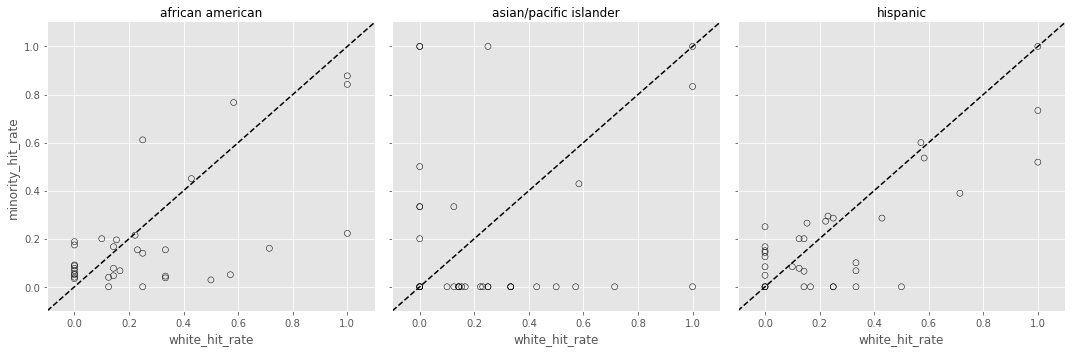

In [63]:
plot_rates_comparison('hit_rate', hit_rates, 'white', 'minority_group', None)

What if the datapoints which are above the 45 degree line (i.e. where minority hit rate is equal to white hit rate) have most of the population within Sacremento? That might suggest that we should give those datapoints more weight. Intuitively, each police officer has different number of total searches. As such, we should include the total number of searches for each police officer as an additional dimension. This would similarly be the case if we were using police districts as well. Let us update our dataframe as well as our plots.

In [64]:
hit_rates_search = hit_rates.merge(calc_group_size(stops_2018_experienced_officers[stops_2018_experienced_officers['search_conducted']], ['OfficerAbra'], False), 
                                   how='left', on='OfficerAbra')
hit_rates_search.rename({'n': 'num_searches'}, axis=1, inplace=True)
hit_rates_search.head()

,OfficerAbra,white_hit_rate,minority_group,minority_hit_rate,num_searches
0,3574,0.500,african american,0.028571,49
1,3574,0.500,asian/pacific islander,0.000000,49
2,3574,0.500,hispanic,0.000000,49
3,3684,0.125,african american,0.039216,88
4,3684,0.125,asian/pacific islander,0.333333,88


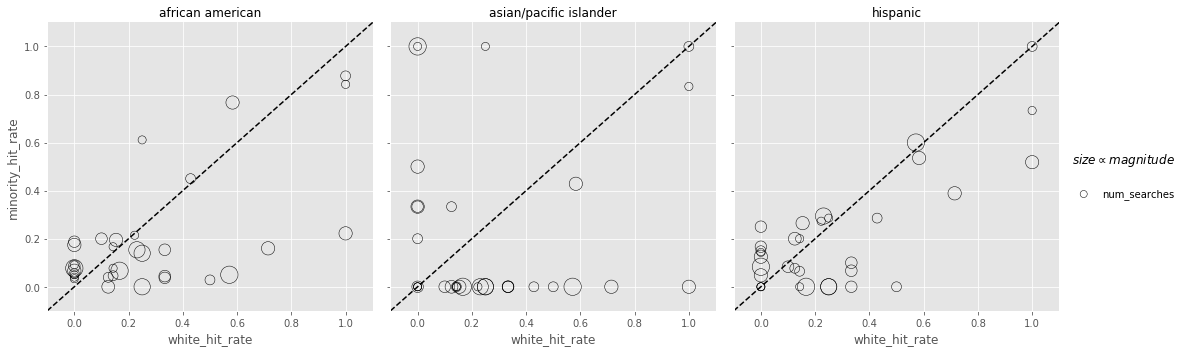

In [65]:
plot_rates_comparison('hit_rate', 
                      hit_rates_search, 
                      'white', 'minority_group', 'num_searches', 
                      marker_size_scale = 0.5)

In [66]:
hit_rates_search[hit_rates_search['white_hit_rate'] == 0]['OfficerAbra'].unique()

array([4166, 4246, 4275, 4303, 4376, 4438, 4442, 4443, 4486, 4512])

In [67]:
stops_2018_experienced_officers[stops_2018_experienced_officers['OfficerAbra']\
                                .isin(hit_rates_search[hit_rates_search['white_hit_rate'] == 0]['OfficerAbra'].unique())]\
                                .groupby(['OfficerAbra', 'subject_race'])['search_conducted'].count()

OfficerAbra  subject_race          
4166         african american          123
             asian/pacific islander      8
             hispanic                   45
             white                      10
4246         african american           68
             asian/pacific islander      5
             hispanic                   30
             white                      15
4275         african american          112
             asian/pacific islander     11
             hispanic                   52
             white                      17
4303         african american           55
             asian/pacific islander      2
             hispanic                   13
             white                       4
4376         african american           84
             asian/pacific islander      4
             hispanic                   35
             white                      28
4438         african american           70
             asian/pacific islander      4
             hispa

In [68]:
stops_2018_experienced_officers[stops_2018_experienced_officers['OfficerAbra']\
                                .isin(hit_rates_search[hit_rates_search['minority_hit_rate'] == 0]['OfficerAbra'].unique())]\
                                .groupby(['OfficerAbra', 'subject_race'])['search_conducted'].count()

OfficerAbra  subject_race          
3574         african american           72
             asian/pacific islander      4
             hispanic                   32
             white                      16
3865         african american           58
             asian/pacific islander     12
             hispanic                   73
             white                      36
4028         african american          153
             asian/pacific islander      9
             hispanic                   68
             white                      30
4075         african american           52
             asian/pacific islander      6
             hispanic                   28
             white                      21
4111         african american           91
             asian/pacific islander     37
             hispanic                  119
             white                     106
4114         african american          126
             asian/pacific islander      2
             hispa

Due to the huge disparity between the number of searches of each police officer, we decided to not bin the number of searches like in the Stanford Open Policy Project (which was with respect to police districts rather than police officers). This would allow us to better identify the outliers in our dataset. 

Ideally, we would want a good spread of hit rates around the 45 degree line, suggesting similar white and minority hit rates. However, for African American/Hispanic drivers, there seems to be a subtantial number of police officers with data points located to the right of the 45 degree line. These police officers have lower African American/Hispanic hit rates as compared to White hit rates. This means that they were less successful with their minority searches. As such, this might be reason to believe that there might be racial profiling in police stops, as it indicates that the police officers are searching these individuals just because of their race. There are some officers with 0 hit rate for White drivers, but looking at these officers, most of them searched White drivers very few times to begin with! In contrast, there are some officers with 0 hit rate for African American/Hispanic drivers, but looking at these offiers, most of them have searched quite a large number of the minority race! This further strengthens the evidence that there is racial bias.

The Asian/Pacific Islander plot is largely made up of points lined along the x-axis and y-axis, suggesting that police officers either have zero minority hit rate or zero white hit rates. This is largely because of the small number of Asian/Pacific Islander stops in general as mentioned before.

### Caveats about the outcome test

The outcome test is a relatively simple yet compelling way to demonstrate discrimination in an easily understood graph. However, as it only observes outcomes, they actually suffer from the problem of **intra-marginality**. This means that even without discrimination, there might be a disparity across racial groups because of a difference in risk distribution within racial groups. 

Suppose there are only 2 types of White drivers: those who have a 1% chance of carrying contraband, those who have a 80% chance of carrying contraband. Similarly, there are 2 types of African American drivers: those who have a 1% chance of carrying contraband, those who have a 60% chance of carrying contraband. If race-neutral police officers only search drivers who have at least a 10% chance of carrying contraband, they will be successful 80% of the time with white drivers, and 60% of the time with African American drivers. This is irregardless of the proportion within racial groups of carrying contraband! [https://5harad.com/papers/threshold-test.pdf]

As such, we often use the threshold test, which circumvents the limitations of outcome tests by simultaneously estimating decision thresholds and risk distributions, in order to validate the outcome test. 

## Threshold Test
***

The threshold test is essentially a comparison of search threshold rates between the majority and minority groups. In order to model these threshold rates, we will have to construct a hierarchical Bayesian latent variable model. This might sound intimidating, but the intuition behind this generative model is relatively simple. The model is called a hierarchical model because the model is organized in a tree-like structure, modeling a decision making process, i.e. the probability of stopping a driver as being driven by two 'higher-level' factors: the driver's race and the individual police officer's judgement. The latent variable refers to the unobserved threshold rates and individual probabilistic judgements that guide the decision making process of police officers when they make a stop decision. As we observe the stop and hit rates in our dataset, we can then model and thus infer what are these unobserved latent variables. 

Essentially, we are modeling a decision process. We assume that when police officers stop a driver, they form their own probabilities, $p_i$ that the stopped driver has contrabands based on the driver’s minority group  and their own individual judgement. They also have an individual threshold $t_i$ for each minority group for deciding when to search a stopped driver. If $p_i \geq t_i$ they decide to search the stopped driver. The success of the search is then a draw from a $Bern~(p_i)$ distribution. If there is a significant difference in thresholds across groups, we may have reason to believe that there is minority group profiling. 

The modeling is done through a Monte Carlo Markov Chain (MCMC) sampling process. For the purposes of this analysis, you only need to understand the model structure and modeling assumptions. We have provided a `.stan` file that would make the actual modeling very simple. In a MCMC sampling process, we essentially approximate distributions by sampling from them. In our sampler, after we model the decision process that we have explained above, we are essentially sampling from the posterior distributions for, most importantly, the threshold rates. 

To use our data with the `.stan` file, we have to change the format of our dataframe slightly. We start by constructing a similar dataframe detailing the number of stops, searches, and the search and hit rates for each police officer and each race. We then one-hot encode the categories (the police officer and the subject race) by using `.replace` to replace each category with unique integers.

In [69]:
threshold_dat = (stops_2018_experienced_officers # for ease of analysis, drop other/unknown, and select only 
                 .groupby(['OfficerAbra', 'subject_race'], as_index=False)
                 .agg({'Idx': 'count', # num of stops
                       'search_conducted': 'sum', # num of searches
                       'contraband_found': 'sum'})
                 .rename({'Idx': 'num_stops',
                          'search_conducted': 'num_searches',
                          'contraband_found': 'num_hits'}, axis=1)) # num of hits

threshold_dat = threshold_dat[threshold_dat['num_searches']!=0] # only those with searches
threshold_dat['search_rate'] = threshold_dat['num_searches'] / threshold_dat['num_stops']
threshold_dat['hit_rate'] = threshold_dat['num_hits'] / threshold_dat['num_searches']
threshold_dat.sort_values('OfficerAbra')
threshold_dat.reset_index(drop=True, inplace=True)
threshold_dat['num_searches'] = threshold_dat['num_searches'].astype(int)
threshold_dat['num_hits'] = threshold_dat['num_hits'].astype(int)
threshold_dat.head()

,OfficerAbra,subject_race,num_stops,num_searches,num_hits,search_rate,hit_rate
0,3574,african american,72,35,1,0.486111,0.028571
1,3574,asian/pacific islander,4,1,0,0.250000,0.000000
2,3574,hispanic,32,9,0,0.281250,0.000000
3,3574,white,16,4,2,0.250000,0.500000
4,3684,african american,81,51,2,0.629630,0.039216


In [70]:
"""data {
    int<lower=1> N; // number of observations
    int<lower=1> R; // number of suspect races
    int<lower=1> D; // number of counties

    int<lower=1,upper=R> r[N]; // race of suspect
    int<lower=1,upper=D> d[N]; // county where stop occurred
    int<lower=1> n[N]; // # of stops
    int<lower=0> s[N]; // # of searches
    int<lower=0> h[N]; // # of successful searches (hits)
}
"""

threshold_dat_stan = threshold_dat.copy()

# easier if subject_race and OfficerAbra were encoded as categorical integers
# trick such that values to be replaced are all strings
threshold_dat_stan['OfficerAbra'] = [str(i) for i in threshold_dat_stan.OfficerAbra]
threshold_dat_stan.replace({'OfficerAbra': {val: i + 1 for i, val in enumerate(threshold_dat_stan.OfficerAbra.unique())},
                      'subject_race': {val: i + 1 for i, val in enumerate(threshold_dat_stan.subject_race.unique())}},
                      inplace=True)
threshold_dat_stan.columns = ['d', 'r', 'n', 's', 'h', 'search_rate', 'hit_rate']
threshold_dat_stan.head()

,d,r,n,s,h,search_rate,hit_rate
0,1,1,72,35,1,0.486111,0.028571
1,1,2,4,1,0,0.250000,0.000000
2,1,3,32,9,0,0.281250,0.000000
3,1,4,16,4,2,0.250000,0.500000
4,2,1,81,51,2,0.629630,0.039216


In order to run the `.stan` file, we then have to convert our dataframe into a dictionary of lists. After calling upon the provided `model.stan` file, we can then call the MCMC sampling process modeled in the file on our police stops data with `.sampling`. The function has several parameters but importantly, `iter` specifies the number of iterations that we run our sampling procedure for, `chain` specifies the number of separate sampling processes to run. It is thus imperative to understand one additional thing about a MCMC sampling process. When we try to sample from a distribution using any algorithm (in our case the `NUTS` Hamiltonian Monte Carlo algorithm), we need to confirm that the sampling distribution approximates the actual distribution specified in our model. Usually, the first few samples are essentially a random walk, and we thus have to sample a substantial number of iterations before the sampling distribution approximates the actual distribution. We also do several chains in order to compare the sampling distributions. 

As such, there are two important simple checks whenever a MCMC sampling process is called to ensure that the sampler has converged, which essentially means that the sampling distribution approximates the actual distribution. The first is the Gelman-Rubin convergence statistic which can be found in the summary of your sampling under the `Rhat` column. Without going into exact details, the `Rhat` should be less than 1.05 for your specified random variables. 

Traceplots are another way to check if the sampler has converged. For the random variable of interest, you essentially call a `.plot` on the sampling summary. The plot on the left is a density plot of the posterior distribution of the random variable; the plot on the right is the traceplot. The traceplot essentially plots the sampling process across the number of specified iterations for each chain. Each chain is specified in a different color. The traceplot should be stationary (constant mean and variance) over iterations, reflecting a stable sampler and we should expect that the traceplots for each chain to be largely similar, and thus overlapping. 

In [295]:

threshold_dat_dict = {
                    'd': list(threshold_dat_stan['d']),
                    'r': list(threshold_dat_stan['r']),
                    'n': list(threshold_dat_stan['n']),
                    's': list(threshold_dat_stan['s']),
                    'h': list(threshold_dat_stan['h'])
                     }
threshold_dat_dict['N'] = len(threshold_dat_stan)
threshold_dat_dict['R'] = len(threshold_dat_stan['r'].unique())
threshold_dat_dict['D'] = len(threshold_dat_stan['d'].unique())

In [247]:
import os
os.environ['MACOSX_DEPLOYMENT_TARGET'] = '10.9'

sm = pystan.StanModel(file = 'model.stan');

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3ba3a30c7e329693c789bb873d21a2ab NOW.


In [298]:
fit = sm.sampling(data=threshold_dat_dict, iter=5000, chains=2, algorithm = 'NUTS', control={'max_treedepth': 10,
                                                                                             'adapt_delta':0.9}
                 )

In [150]:
# import pickle
# with open("race_model_fit.pkl", "wb") as f:
#     pickle.dump({'model' : sm, 'fit' : fit}, f, protocol=-1)

    
# with open("race_model_fit.pkl", "rb") as f:
#     data_dict = pickle.load(f)
# fit = data_dict['fit']

# fit

In [299]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_3ba3a30c7e329693c789bb873d21a2ab.
2 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=5000.

                 mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
sigma_t[1]       0.24  4.2e-3    0.2 8.3e-3   0.09   0.19   0.33   0.75   2296    1.0
sigma_t[2]       0.48  6.9e-3    0.4   0.02   0.18   0.39   0.69   1.47   3423    1.0
sigma_t[3]       0.31  4.9e-3   0.23   0.01   0.14   0.27   0.44   0.86   2166    1.0
sigma_t[4]        0.7    0.01    0.5   0.03   0.33   0.61   0.98   1.95   1517    1.0
mu_phi_d        -0.21  8.8e-3   0.33  -0.84  -0.43  -0.22 1.7e-3   0.47   1442    1.0
sigma_phi_d      0.91  3.6e-3   0.14   0.68   0.81    0.9    1.0   1.21   1453    1.0
mu_lambda_d     -0.31    0.01   0.54   -1.4  -0.66  -0.29   0.05    0.7   1363    1.0
sigma_lambda_d   1.46  4.9e-3   0.23   1.07    1.3   1.44    1.6   1.97   2197    1

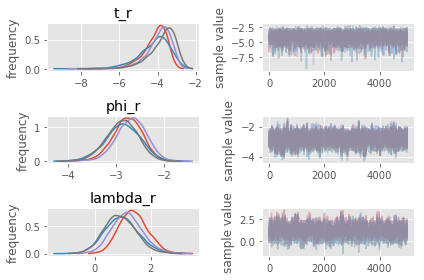

In [300]:
fit.plot(['t_r', 'phi_r', 'lambda_r']);
plt.tight_layout();

If your sampler has converged, you should see `Rhat` values lower than 1.05 and traceplots that look similar to what we have. We can then extract the threshold rates from our sampler by calculating its posterior mean. `.extract()` essentially gives us all the sample values of the specified random variable. As we are mainly interested in threshold rates (which is specified as $t_i$ in our `.stan` model), we extract the samples for $t_i$ and calculate its (posterior) mean. We can then compare the threshold rates for each police officer and minority group with our `compare_rates` function!

In [301]:
threshold_dat['threshold_rate'] = fit.extract()['t_i'].mean(axis = 0)

In [302]:
threshold_rates = compare_rates('threshold_rate', threshold_dat[['OfficerAbra', 'subject_race', 'threshold_rate']], 'white', ['african american', 'hispanic', 'asian/pacific islander'], 
                          'subject_race')
threshold_rates_search = threshold_rates.merge(calc_group_size(stops_2018_experienced_officers[stops_2018_experienced_officers['search_conducted']], ['OfficerAbra'], False), 
                                   how='left', on='OfficerAbra')
threshold_rates_search.rename({'n': 'num_searches'}, axis=1, inplace=True)
threshold_rates_search.head()

,OfficerAbra,white_threshold_rate,minority_group,minority_threshold_rate,num_searches
0,3574,0.038511,african american,0.017217,49
1,3574,0.038511,hispanic,0.026985,49
2,3574,0.038511,asian/pacific islander,0.022907,49
3,3684,0.024155,african american,0.017811,88
4,3684,0.024155,hispanic,0.023830,88


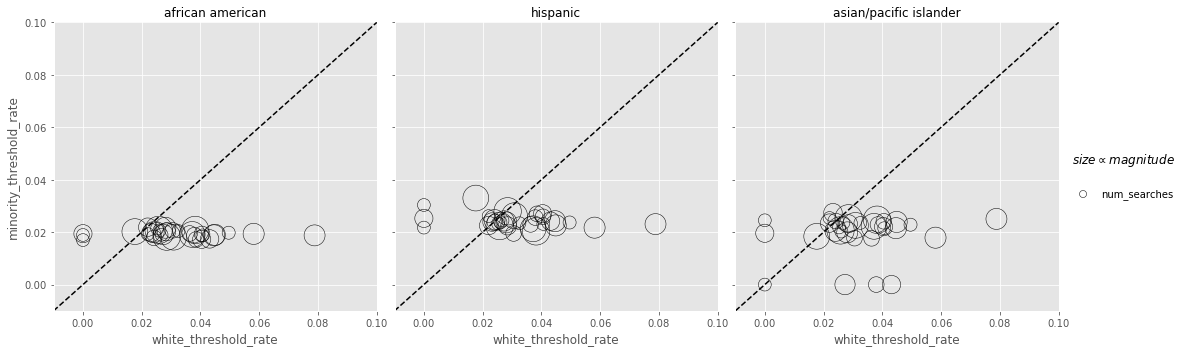

In [303]:
plot_rates_comparison('threshold_rate', 
                      threshold_rates_search, 
                      'white', 'minority_group', 'num_searches', 
                      marker_size_scale = 0.2, min_lim = -0.01, max_lim = 0.1)

In [324]:
average_thresholds = {}
for race in threshold_dat['subject_race'].unique():
    relevant_obs = threshold_dat[threshold_dat['subject_race'] == race]    
    average_thresholds[race] =  (relevant_obs['threshold_rate'] * relevant_obs['num_stops']).sum() / relevant_obs['num_stops'].sum()
average_thresholds

{'african american': 0.019432174534314884,
 'asian/pacific islander': 0.022916264980461662,
 'hispanic': 0.024159918514152556,
 'white': 0.03346527640264774}

From our plots, we can similarly see that there is a high number of police officers to the right of the 45 degree line for the African American/Hispanic drivers. These suggest that the threshold rates for White drivers are generally much higher than the threshold rates for minority group drivers. This seems like there is possibly racial discrimination against African American/Hispanic drivers. The average threshold rates are lower for African American and Hispanic drivers compared to White drivers as well.

Once again, due to the low number of Asian/Pacific Islander searches in general, we cannot make much interpretations from the plot.

## Conclusion of Race Analysis
***

From the benchmark, VOD, outcome and threshold tests, there seems to be consistent evidence for racial profiling in police stops towards African American/Hispanic drivers. While each individual tests has their own shortcomings like we have elaborated on, if all of the tests seem to suggest that there is racial profiling, it might be a cause for concern. In particular, the threshold test is already a very robust test, and there seems to be strong evidence of racial profiling from our plots. As such, we can conclude that there is almost definitely some evidence of racial bias in police stops in Sacramento. 

***

## Gender Extension

The two most commonly touted factors of discrimination are gender and race. While the Stanford Open Policing Project does not explore gender bias at all, we were curious about the presence of gender discrimination in police stops, and decided to do the analysis for the Sacramento dataset.

In [71]:
calc_group_size(sacramento_stops, 'Gender')

,Gender,n,prop
0,F,19687,0.332736
1,M,39480,0.667264


There is a substantially greater number of male drivers as compared to female drivers. As such, we should once again be looking at the proportion with regard to the actual proportion of males and females in Sacramento.

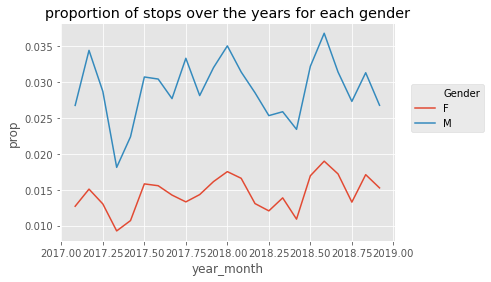

In [72]:
gender_year_plot = calc_group_size(sacramento_stops, ['Gender', 'year', 'month'])

# in order to plot year and month, we make a new column compressing the information
gender_year_plot['year_month'] = gender_year_plot['year'] + (gender_year_plot['month']-1)/12.

ax = sns.lineplot(x='year_month', y='prop', hue='Gender', data=gender_year_plot)
ax.legend(loc = (1.05, 0.5))
ax.set_title('proportion of stops over the years for each gender');

The the proportion of stops seem to largely follow the same pattern for male and female drivers over the years. This once again highlights that there might be a time factor to police stops.

In [73]:
sacramento_gender_percentages = {"F": .511, "M": .489}
sacramento_gender_demo = pd.DataFrame(sacramento_gender_percentages, index=['prop']).T.reset_index()
sacramento_gender_demo.columns = ['Gender', 'prop']
sacramento_gender_demo['num_people'] = sacramento_gender_demo['prop']*sacramento_population_2018
sacramento_gender_demo

,Gender,prop,num_people
0,F,0.511,782144.265
1,M,0.489,748470.735


In [74]:
calc_stop_rates(stops_2018, sacramento_gender_demo, ['Gender'])

,Gender,stop_rate
0,F,0.012250
1,M,0.025012


In [75]:
calc_search_rates(stops_2018, ['Gender'])

,Gender,search_rate
0,F,0.050204
1,M,0.188558


We did the same benchmark test with regard to stop and search rates. Interestingly, it seems that the stops rates for male drivers are significantly higher (around double). The search rates are also significantly lower (around four times). If the latter was referring to frisk rates, that might be reasonable considering that police officers would probably not be allowed to frisk a driver of the opposite gender. However, there seems to be no good reason why female drivers should be searched at a significantly lower rate. Nonetheless, let us look at the data more rigorously.

In [76]:
is_female = (vod_stops['Gender'] == 'F').astype(int)

X = vod_stops[['is_dark']].merge(dmatrix("cr(data,df = 6)", {"data": vod_stops['minute']}, return_type='dataframe'),
                                left_index = True, right_index = True)
logit_model = sm.GLM(is_female, X, family=sm.families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Gender   No. Observations:                 7110
Model:                            GLM   Df Residuals:                     7103
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4199.0
Date:                Sun, 05 May 2019   Deviance:                       8397.9
Time:                        20:07:25   Pearson chi2:                 7.11e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
is_dark               0.2980      0.065      4.557      0.000       0.170       0.426
Intercept            -0.9623   

The coefficient of darkness is positive, suggesting that there may be evidence of positive discrimination against female drivers. In fact, there seems to be a subtantial difference in stop rates when it is dark as compared to when it is not dark as can be seen from the large size of the coefficient. Importantly, this seems to be statistically significant.

In [77]:
hit_rates_gender = calc_hit_rates(stops_2018_experienced_officers, ['Gender', 'OfficerAbra'])
hit_rates_gender = compare_rates('hit_rate', 
                                 hit_rates_gender, 
                                 'M', 
                                 ['F'], 
                                 'Gender')
hit_rates_gender_search = hit_rates_gender.merge(calc_group_size(stops_2018[stops_2018['search_conducted']], ['OfficerAbra'], False), 
                                   how='left', on='OfficerAbra')
hit_rates_gender_search.rename({'n': 'num_searches'}, axis=1, inplace=True)
hit_rates_gender_search.head()

,OfficerAbra,M_hit_rate,minority_group,minority_hit_rate,num_searches
0,3574,0.063830,F,0.0,49
1,3684,0.070588,F,0.0,88
2,3790,0.901639,F,1.0,68
3,3865,0.466667,F,0.0,49
4,4028,0.216000,F,0.0,133


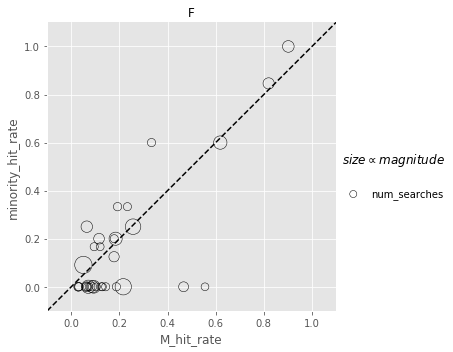

In [78]:
plot_rates_comparison('hit_rate', 
                      hit_rates_gender_search, 
                      'M', 'minority_group', 'num_searches', 
                      marker_size_scale = 0.5)

In [320]:
stops_2018_experienced_officers[stops_2018_experienced_officers['OfficerAbra']\
                                .isin(hit_rates_gender_search[hit_rates_gender_search['minority_hit_rate'] == 0]['OfficerAbra'].unique())]\
                                .groupby(['OfficerAbra', 'Gender'])['search_conducted'].count()

OfficerAbra  Gender
3574         F          17
             M         107
3684         F           9
             M         145
3865         F          47
             M         132
4028         F          23
             M         237
4111         F         102
             M         251
4166         F          23
             M         163
4176         F          47
             M         123
4246         F          23
             M          95
4275         F          24
             M         168
4303         F           5
             M          69
4376         F          39
             M         112
4421         F          37
             M         136
4438         F          22
             M          98
4442         F          29
             M         117
4443         F          41
             M         118
4480         F          58
             M         145
4489         F          47
             M         104
4512         F          45
             M         153
4564    

It seems that the police officers are largely spread around the 45 degree line. This suggests that the hit rates for male and female drivers are pretty similar. If anything, male hit rates seems to be slightly lower than female hit rates. We also noticed that there seems to be a large cluster of points with 0 hit rate for females that suggests bias against females. A quick check shows that this is because of the low number of searches conducted for females for this cluster of points. As such, we should be cautious about making any conclusions for now...

In [79]:
gender_threshold_dat = (stops_2018_experienced_officers
                 .groupby(['OfficerAbra', 'Gender'], as_index=False)
                 .agg({'Idx': 'count', # num of stops
                       'search_conducted': 'sum', # num of searches
                       'contraband_found': 'sum'})
                 .rename({'Idx': 'num_stops',
                          'search_conducted': 'num_searches',
                          'contraband_found': 'num_hits'}, axis=1)) # num of hits

gender_threshold_dat = gender_threshold_dat[gender_threshold_dat['num_searches']!=0] # only those with searches
gender_threshold_dat['search_rate'] = gender_threshold_dat['num_searches'] / gender_threshold_dat['num_stops']
gender_threshold_dat['hit_rate'] = gender_threshold_dat['num_hits'] / gender_threshold_dat['num_searches']
gender_threshold_dat.sort_values('OfficerAbra')
gender_threshold_dat.reset_index(drop=True, inplace=True)
gender_threshold_dat['num_searches'] = gender_threshold_dat['num_searches'].astype(int)
gender_threshold_dat['num_hits'] = gender_threshold_dat['num_hits'].astype(int)

gender_threshold_dat_stan = gender_threshold_dat.copy()

gender_threshold_dat_stan['OfficerAbra'] = [str(i) for i in gender_threshold_dat_stan.OfficerAbra]
gender_threshold_dat_stan.replace({'OfficerAbra': {val: i + 1 for i, val in enumerate(gender_threshold_dat_stan.OfficerAbra.unique())},
                      'Gender': {val: i + 1 for i, val in enumerate(gender_threshold_dat_stan.Gender.unique())}},
                      inplace=True)

gender_threshold_dat_stan.columns = ['d', 'r', 'n', 's', 'h', 'search_rate', 'hit_rate']
gender_threshold_dat_stan.head()

gender_threshold_dat_dict = {
                    'd': list(gender_threshold_dat_stan['d']),
                    'r': list(gender_threshold_dat_stan['r']),
                    'n': list(gender_threshold_dat_stan['n']),
                    's': list(gender_threshold_dat_stan['s']),
                    'h': list(gender_threshold_dat_stan['h'])
                     }
gender_threshold_dat_dict['N'] = len(gender_threshold_dat_stan)
gender_threshold_dat_dict['R'] = len(gender_threshold_dat_stan['r'].unique())
gender_threshold_dat_dict['D'] = len(gender_threshold_dat_stan['d'].unique())

In [80]:
gender_threshold_dat.head()

,OfficerAbra,Gender,num_stops,num_searches,num_hits,search_rate,hit_rate
0,3574,F,17,2,0,0.117647,0.000000
1,3574,M,107,47,3,0.439252,0.063830
2,3684,F,9,3,0,0.333333,0.000000
3,3684,M,145,85,6,0.586207,0.070588
4,3790,F,27,7,7,0.259259,1.000000


In [308]:
gender_fit = sm.sampling(data=gender_threshold_dat_dict, iter=5000, chains=2, algorithm = 'NUTS', control={'max_treedepth': 10,
                                                                                             'adapt_delta':0.9}
                 )

In [317]:
# import pickle
# with open("gender_model_fit.pkl", "wb") as f:
#     pickle.dump({'model' : sm, 'fit' : gender_fit}, f, protocol=-1)

    
# with open("race_model_fit.pkl", "rb") as f:
#     data_dict = pickle.load(f)
# gender_fit_loaded = data_dict['fit']

# gender_fit_loaded

In [309]:
gender_fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_3ba3a30c7e329693c789bb873d21a2ab.
2 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=5000.

                 mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
sigma_t[1]       0.45  8.6e-3   0.36   0.02   0.17   0.37   0.65   1.36   1782    1.0
sigma_t[2]       0.34  6.7e-3   0.26   0.01   0.14   0.29   0.47   0.97   1541    1.0
mu_phi_d         0.02  9.7e-3   0.36   -0.7  -0.22   0.02   0.26   0.75   1414    1.0
sigma_phi_d      0.91  3.2e-3   0.14   0.67   0.81   0.89   0.99   1.21   1849    1.0
mu_lambda_d     -0.58    0.02   0.65   -1.9  -1.01  -0.56  -0.14   0.65   1821    1.0
sigma_lambda_d   1.55  6.1e-3   0.26   1.13   1.37   1.52    1.7   2.13   1800    1.0
t_r[1]          -4.04    0.02   0.73  -5.96  -4.38  -3.89  -3.53  -3.03   1932    1.0
t_r[2]          -3.79    0.01   0.62  -5.32  -4.09  -3.68  -3.35  -2.91   1740    1

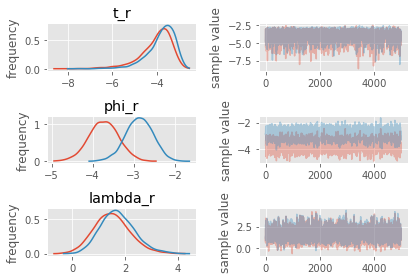

In [310]:
gender_fit.plot(['t_r', 'phi_r', 'lambda_r']);
plt.tight_layout();

In [311]:
gender_threshold_dat['threshold_rate'] = gender_fit.extract()['t_i'].mean(axis = 0)
gender_threshold_rates = compare_rates('threshold_rate', gender_threshold_dat[['OfficerAbra', 'Gender', 'threshold_rate']], 'M', ['F'], 
                          'Gender')
gender_threshold_rates_search = gender_threshold_rates.merge(calc_group_size(stops_2018_experienced_officers[stops_2018_experienced_officers['search_conducted']], ['OfficerAbra'], False), 
                                   how='left', on='OfficerAbra')
gender_threshold_rates_search.rename({'n': 'num_searches'}, axis=1, inplace=True)
gender_threshold_rates_search.head()

,OfficerAbra,M_threshold_rate,minority_group,minority_threshold_rate,num_searches
0,3574,0.023652,F,0.025504,49
1,3684,0.024886,F,0.020678,88
2,3790,0.028029,F,0.025726,68
3,3865,0.027103,F,0.024024,49
4,4028,0.030287,F,0.019017,133


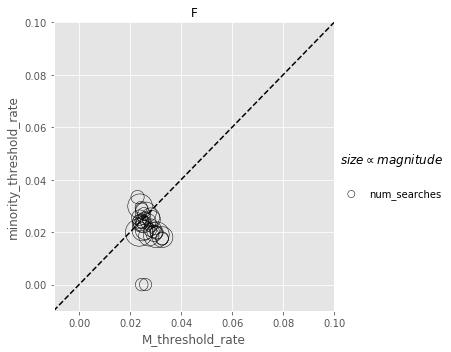

In [312]:
plot_rates_comparison('threshold_rate', 
                      gender_threshold_rates_search, 
                      'M', 'minority_group', 'num_searches', 
                      marker_size_scale = 0.2, min_lim = -0.01, max_lim = 0.1)

It seems like there is not much of a difference in threshold rates for male and female drivers. The points are largely clustered around the same region, suggesting that police officers have largely similar threshold rates for male and female drivers.

## Conclusion of Gender Analysis
***

The importance of using several tests is emphasized by our analysis of gender bias in police stops. In this case, there seems to be contrasting conclusions that can be drawn from individual tests. This can suggest that there is perhaps little evidence of gender bias in police stops, or suggest that more robust tests should be run to better analyze gender bias in police stops. From our current analysis, it seems that there is perhaps negligible gender bias in the city of Sacramento. Nonetheless, we may conduct further tests and experiments in the future to better test the validity of the statement.

## Overall Conclusion
***

We first started off by writing out the code to replicate the Stanford Open Policing Project in Python. We faced substantial issues trying to reproduce their code. While the project is of an open-source nature, and is definitely more well-documented than many other projects, the reproducibility of their code could still be better improved. In partiular, when they were making plots for their analysis, it seems like they were removing certain data points with zero rates. As this was not documented, we could not seem to figure out the actual filtering process that was done in their analysis. Nonetheless, the findings were largely similar even though there are differences in the outcome tests plots. This gave us strong impetus to make our own Python tutorial as detailed as possible, and our own Python code to be as easily reproducible as possible. We summarized most of our code into Python functions that can be easily called to replicate similar analysis on police stops data.

We then subsequently did our own Python tutorial and analysis on the city of Sacramento which had not yet been covered by existing police stops studies. We also elaborated on how to apply the threshold test to police stops datasets to add greater rigor to our analysis, and also extended a study on gender bias in police stops as well. We found that there is substantial evidence of racial bias in police stops against African American/Hispanic drivers, and very small evidence of gender bias in police stops against male drivers surprisingly. The latter highlighted that there may be value conducting even more tests in the future. Specifically, there are several other variations of outcome tests, and specifications of the threshold test which could be further explored. We are also excited to help extend the analysis to other cities and municipals as they release their own police stops data in the future. By making the analysis even more comprehensive, we can better hold our law enforcers accountable for their decisions and correct the bias in our society. 
